## EURUSD

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
eur_usd = pd.read_csv('./Data/EURUSD.csv')
eur_usd

,Gmt time,Open,High,Low,Close,Volume
0,04.05.2003 21:00:00.000,1.12354,1.12354,1.12279,1.12331,24206.599600
1,04.05.2003 22:00:00.000,1.12290,1.12317,1.12240,1.12251,23023.599600
2,04.05.2003 23:00:00.000,1.12255,1.12255,1.12176,1.12179,24839.699200
3,05.05.2003 00:00:00.000,1.12177,1.12318,1.12166,1.12274,23463.199200
4,05.05.2003 01:00:00.000,1.12242,1.12276,1.12119,1.12150,25406.599600
...,...,...,...,...,...,...
108023,18.08.2020 17:00:00.000,1.19364,1.19384,1.19299,1.19320,0.008529
108024,18.08.2020 18:00:00.000,1.19319,1.19389,1.19285,1.19382,0.004622
108025,18.08.2020 19:00:00.000,1.19382,1.19385,1.19306,1.19334,0.005943
108026,18.08.2020 20:00:00.000,1.19335,1.19384,1.19296,1.19317,0.002447


In [3]:
eur_usd.rename(columns={'Gmt time' : 'date', 
                   'Open':'open',
                   'High':'high',
                   'Low':'low',
                   'Close':'close',
                   'Volume':'volume'}, inplace=True)

eur_usd["date"] = pd.to_datetime(eur_usd['date'])
eur_usd['date'] = pd.to_datetime(eur_usd['date'], format='%Y-%m-%d %H:%M:%S')
eur_usd.sort_values('date', inplace=True)
eur_usd.reset_index(inplace=True, drop=True)

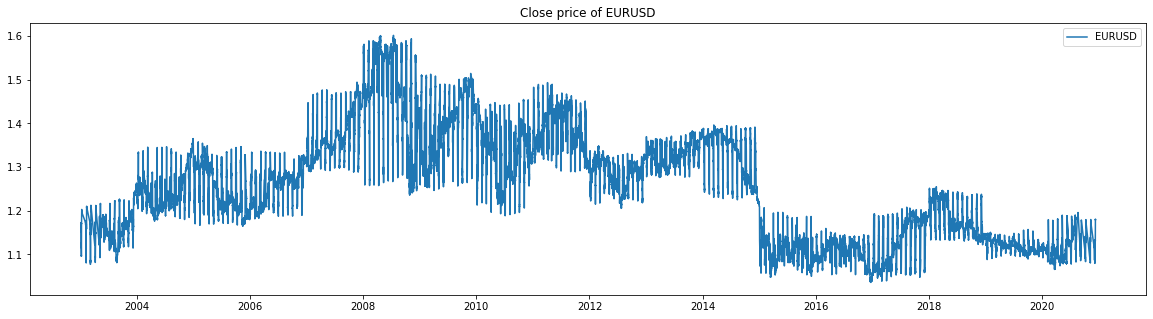

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(eur_usd['date'], eur_usd['close'], label = 'EURUSD')
plt.title('Close price of EURUSD')
plt.legend(loc='best')
plt.show()

In [5]:
eur_usd.describe()

,open,high,low,close,volume
count,108028.000000,108028.000000,108028.000000,108028.000000,108028.000000
mean,1.258536,1.259577,1.257499,1.258539,21553.954875
std,0.122251,0.122421,0.122060,0.122250,33702.155079
min,1.035600,1.037040,1.034050,1.035630,0.000498
25%,1.142960,1.143880,1.142070,1.142950,5139.510050
50%,1.259450,1.260640,1.258255,1.259455,12194.800300
75%,1.345660,1.346690,1.344700,1.345640,25487.549800
max,1.601460,1.604030,1.598830,1.601570,491584.312500


In [6]:
import talib

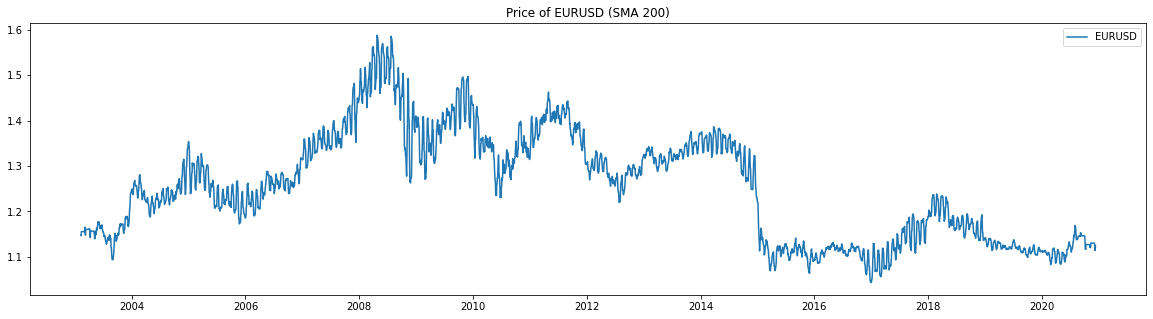

In [7]:
eur_usd['simple_ma_200'] = talib.MA(eur_usd['close'], 200)
plt.figure(figsize=(20, 5))
plt.plot(eur_usd['date'], eur_usd['simple_ma_200'], label='EURUSD')
plt.title('Price of EURUSD (SMA 200)')
plt.legend(loc='best')
plt.show()

In [8]:
def prepare_dataset(df, currency_name=None, view=True):
    df.rename(columns={'Gmt time' : 'date', 
                   'Open':'open',
                   'High':'high',
                   'Low':'low',
                   'Close':'close',
                   'Volume':'volume'}, inplace=True)

    df["date"] = pd.to_datetime(df['date'])
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    df.sort_values('date', inplace=True)
    df.reset_index(inplace=True, drop=True)

    if view:        
        display(df)
        display(df.describe())

        df['simple_ma_200'] = talib.MA(df['close'], 200)
        plt.figure(figsize=(20, 5))
        plt.plot(df['date'], df['simple_ma_200'], label=currency_name)
        plt.title('Price of ' + currency_name)
        plt.legend(loc='best')
        plt.show()

## USDJPY

,date,open,high,low,close,volume
0,2003-01-06 21:00:00,119.571,119.616,119.368,119.616,12289.9004
1,2003-01-06 22:00:00,119.590,119.645,119.517,119.601,11730.4004
2,2003-01-06 23:00:00,119.608,119.636,119.500,119.500,11442.5996
3,2003-01-07 00:00:00,119.691,119.721,119.450,119.553,12804.5996
4,2003-01-07 01:00:00,119.527,119.527,119.214,119.462,12569.5996
...,...,...,...,...,...,...
108017,2020-12-08 19:00:00,106.864,106.909,106.848,106.881,4399.1500
108018,2020-12-08 20:00:00,106.882,106.925,106.822,106.925,2523.3000
108019,2020-12-08 21:00:00,106.916,106.932,106.845,106.889,439.2200
108020,2020-12-08 22:00:00,106.894,106.894,106.851,106.882,1569.1800


,open,high,low,close,volume
count,108022.000000,108022.000000,108022.000000,108022.000000,1.080220e+05
mean,104.375410,104.462257,104.283615,104.375616,1.963857e+04
std,12.589851,12.594443,12.585025,12.589996,6.028092e+04
min,75.652000,75.759000,75.584000,75.695000,1.081440e-03
25%,97.410000,97.560000,97.290250,97.410000,4.462715e+03
50%,107.806500,107.884000,107.726000,107.808000,9.138280e+03
75%,113.112750,113.196000,113.012750,113.113000,1.456398e+04
max,125.685000,125.859000,125.613000,125.683000,2.577312e+06


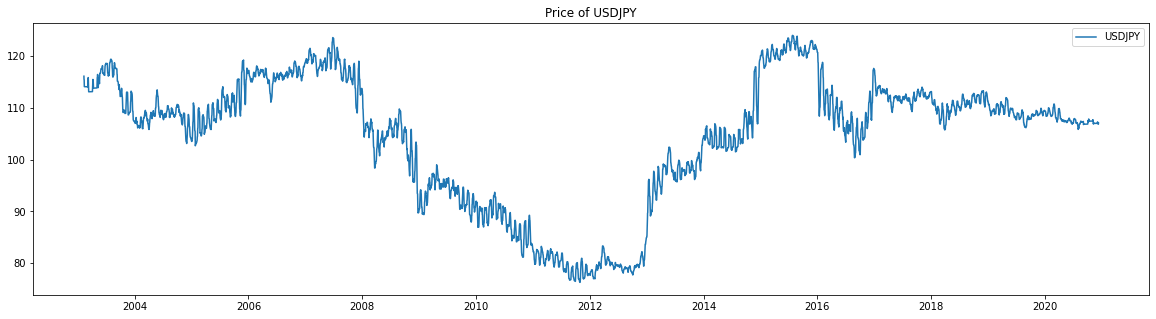

In [9]:
usd_jpy = pd.read_csv('./Data/USDJPY.csv')
prepare_dataset(usd_jpy, 'USDJPY')

## GBPUSD

,date,open,high,low,close,volume
0,2003-01-06 21:00:00,1.63040,1.63283,1.62707,1.62707,2657.5000
1,2003-01-06 22:00:00,1.62683,1.62725,1.62524,1.62576,2582.5000
2,2003-01-06 23:00:00,1.62579,1.62676,1.62543,1.62614,2947.4272
3,2003-01-07 00:00:00,1.65538,1.65575,1.65305,1.65312,2944.0000
4,2003-01-07 01:00:00,1.65299,1.65536,1.65299,1.65470,3043.2500
...,...,...,...,...,...,...
108014,2020-12-08 19:00:00,1.30264,1.30329,1.30215,1.30224,9620.5000
108015,2020-12-08 20:00:00,1.30224,1.30357,1.30216,1.30357,3164.2700
108016,2020-12-08 21:00:00,1.30355,1.30510,1.30323,1.30344,6864.9100
108017,2020-12-08 22:00:00,1.30339,1.30388,1.30324,1.30371,1942.6600


,open,high,low,close,volume
count,108019.000000,108019.000000,108019.000000,108019.000000,108019.000000
mean,1.593002,1.594277,1.591727,1.593003,10295.518498
std,0.225501,0.225584,0.225420,0.225502,21156.614864
min,1.143720,1.147470,1.141400,1.143680,0.003031
25%,1.422380,1.423895,1.420615,1.422380,3652.599400
50%,1.587490,1.588690,1.586330,1.587480,5358.169900
75%,1.761660,1.763260,1.760160,1.761675,10728.054200
max,2.112650,2.116450,2.111050,2.112550,814885.000000


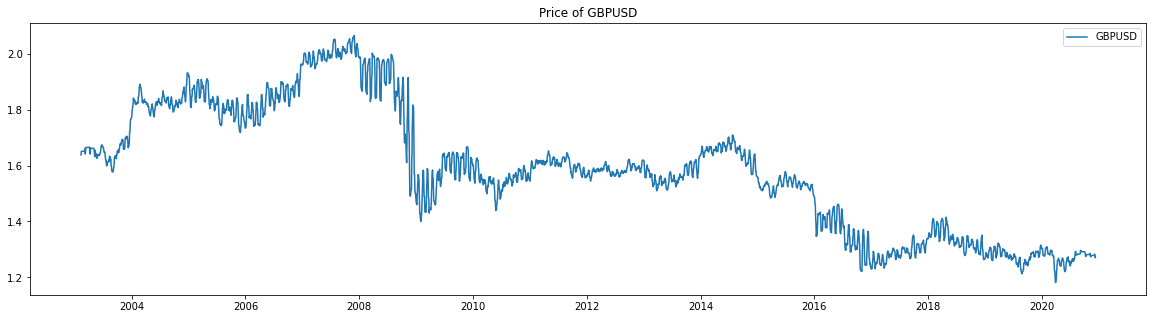

In [10]:
gbp_usd = pd.read_csv('./Data/GBPUSD.csv')
prepare_dataset(gbp_usd, 'GBPUSD')

##                                                         Target

In [11]:
import numpy as np

In [12]:
eur_usd = pd.read_csv('./Data/EURUSD.csv')
prepare_dataset(eur_usd, view=False)

eur_usd["date"] = pd.to_datetime(eur_usd['date'])
eur_usd['date'] = pd.to_datetime(eur_usd['date'], format='%Y-%m-%d %H:%M:%S')
eur_usd.sort_values('date', inplace=True)
eur_usd.reset_index(inplace=True, drop=True)

In [13]:
eur_usd['target'] = np.where(eur_usd['close'].shift(-1) > eur_usd['close'], 1, 0)
eur_usd

,date,open,high,low,close,volume,target
0,2003-01-06 21:00:00,1.17149,1.17476,1.17115,1.17145,24919.8008,0
1,2003-01-06 22:00:00,1.17128,1.17181,1.17073,1.17133,22762.6992,1
2,2003-01-06 23:00:00,1.17154,1.17276,1.17107,1.17213,24167.3008,0
3,2003-01-07 00:00:00,1.15217,1.15281,1.15148,1.15185,24066.8008,1
4,2003-01-07 01:00:00,1.15214,1.15408,1.15180,1.15247,24589.4004,0
...,...,...,...,...,...,...,...
108023,2020-12-08 19:00:00,1.17842,1.17897,1.17828,1.17874,29280.2205,0
108024,2020-12-08 20:00:00,1.17874,1.17904,1.17844,1.17849,2165.6600,0
108025,2020-12-08 21:00:00,1.17850,1.17883,1.17808,1.17836,555.5914,1
108026,2020-12-08 22:00:00,1.17848,1.17910,1.17845,1.17882,1475.2500,1


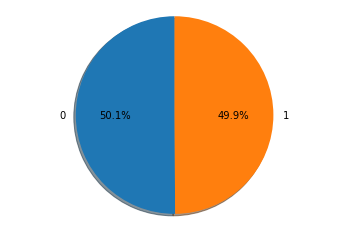

In [14]:
labels = eur_usd.target.unique()
sizes = eur_usd.target.value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [15]:
def create_target(df, periods_fordward, view=True):
    df['target'] = np.where(df['close'].shift(-periods_fordward) > df['close'], 1, 0)
    
    if view:
        labels = df.target.unique()
        sizes = df.target.value_counts().values
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax1.axis('equal')

        plt.show()

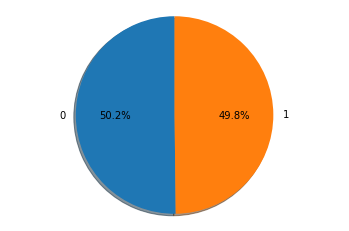

In [16]:
usd_jpy = pd.read_csv('./Data/USDJPY.csv')
prepare_dataset(usd_jpy, view=False)
create_target(usd_jpy, 1)

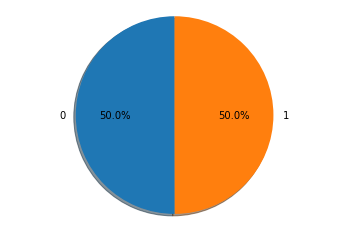

In [17]:
gbp_usd = pd.read_csv('./Data/GBPUSD.csv')
prepare_dataset(gbp_usd, view=False)
create_target(gbp_usd, 1)

## Initial Features

In [173]:
import talib
eur_usd = pd.read_csv('./Data/EURUSD.csv')
prepare_dataset(eur_usd, view=False)

In [174]:
eur_usd["rsi"] = talib.RSI(eur_usd["close"], timeperiod=14)
eur_usd["ema_12"] = talib.EMA(eur_usd["close"], timeperiod=12)
eur_usd["ema_26"] = talib.EMA(eur_usd["close"], timeperiod=26) 

upper_band, middle_band, lower_band = talib.BBANDS(eur_usd["close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
eur_usd["upper_bband"] = upper_band
eur_usd["middle_bband"] = middle_band
eur_usd["lower_bband"] = lower_band

macd, macd_signal, macd_hist = talib.MACD(eur_usd["close"], fastperiod=12, slowperiod=26, signalperiod=9)
eur_usd["macd"] = macd 
eur_usd["macd_signal"] = macd_signal 
eur_usd["macd_hist"] = macd_hist

k, d = talib.STOCH(eur_usd["high"], eur_usd["low"], 
            eur_usd["close"], fastk_period=5, slowk_period=3, 
            slowk_matype=0, slowd_period=3, slowd_matype=0)

eur_usd["k"] = k
eur_usd["d"] = d

In [175]:
eur_usd.head(5)

,date,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
0,2003-01-06 21:00:00,1.17149,1.17476,1.17115,1.17145,24919.8008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-06 22:00:00,1.17128,1.17181,1.17073,1.17133,22762.6992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-06 23:00:00,1.17154,1.17276,1.17107,1.17213,24167.3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07 00:00:00,1.15217,1.15281,1.15148,1.15185,24066.8008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-07 01:00:00,1.15214,1.15408,1.15180,1.15247,24589.4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
eur_usd.dropna(inplace=True)
eur_usd.head(5)

,date,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
33,2003-01-08 06:00:00,1.12143,1.12219,1.11985,1.12063,24471.5996,13.641751,1.133053,1.142386,1.176656,1.144580,1.112504,-0.009378,-0.005336,-0.004042,32.469581,28.545903
34,2003-01-08 07:00:00,1.12014,1.12128,1.11957,1.12055,22474.8008,13.610761,1.131130,1.140769,1.176203,1.142864,1.109526,-0.009677,-0.006204,-0.003473,17.502664,26.063705
35,2003-01-08 08:00:00,1.12013,1.12087,1.11348,1.11525,21969.5996,11.712401,1.128687,1.138878,1.175844,1.140899,1.105954,-0.010224,-0.007008,-0.003216,18.059341,22.677195
36,2003-01-08 09:00:00,1.11550,1.11831,1.11479,1.11771,23376.6992,17.466413,1.126998,1.137310,1.174998,1.139130,1.103263,-0.010340,-0.007674,-0.002665,26.549553,20.703853
37,2003-01-08 10:00:00,1.11753,1.11838,1.11581,1.11620,22129.0000,16.745002,1.125337,1.135747,1.173573,1.137178,1.100784,-0.010433,-0.008226,-0.002207,30.125014,24.911303


### Exponential Moving Average (EMA)

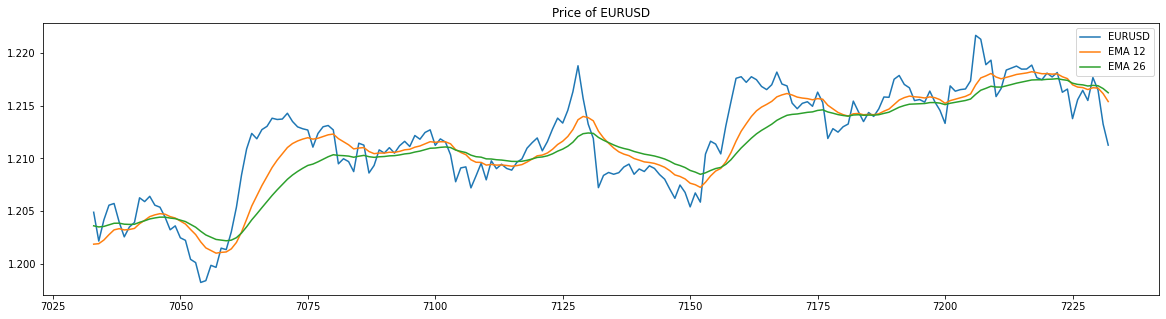

In [22]:
show_df = eur_usd[7000:7200]

plt.figure(figsize=(20, 5))
plt.plot(show_df.index, show_df['close'], label='EURUSD')
plt.plot(show_df.index, show_df['ema_12'], label='EMA 12')
plt.plot(show_df.index, show_df['ema_26'], label='EMA 26')

plt.title('Price of EURUSD')
plt.legend(loc='best')
plt.show()

### Bollinger Bands

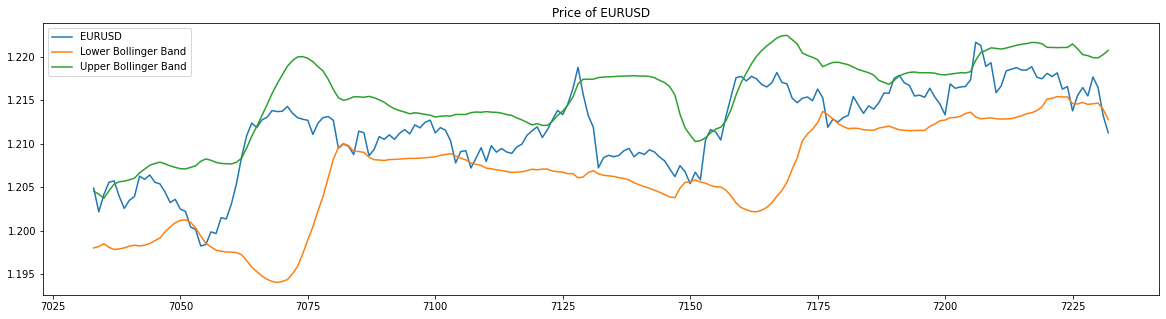

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(show_df.index, show_df['close'], label='EURUSD')
plt.plot(show_df.index, show_df['lower_bband'], label='Lower Bollinger Band')
plt.plot(show_df.index, show_df['upper_bband'], label='Upper Bollinger Band')

plt.title('Price of EURUSD')
plt.legend(loc='best')
plt.show()

### Relative Strength Index

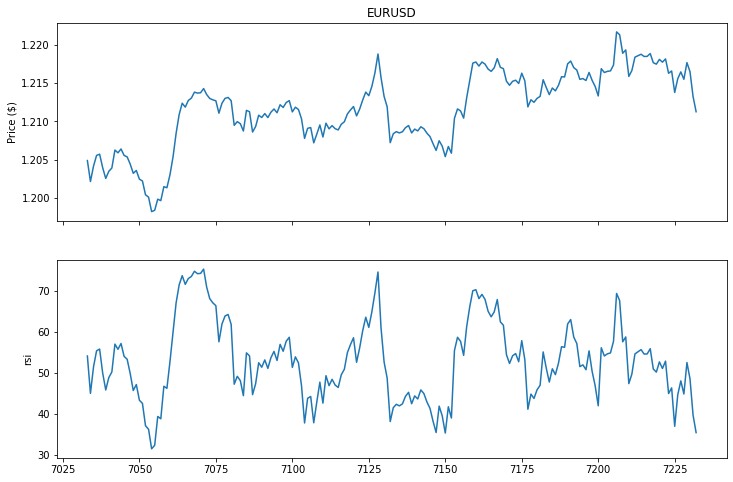

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# add prices
show_df.close.plot(ax=ax[0])
ax[0].set(title = 'EURUSD', ylabel = 'Price ($)')
    
show_df.rsi.plot(ax=ax[1])
ax[1].set(ylabel = 'rsi')

plt.show()

### MACD

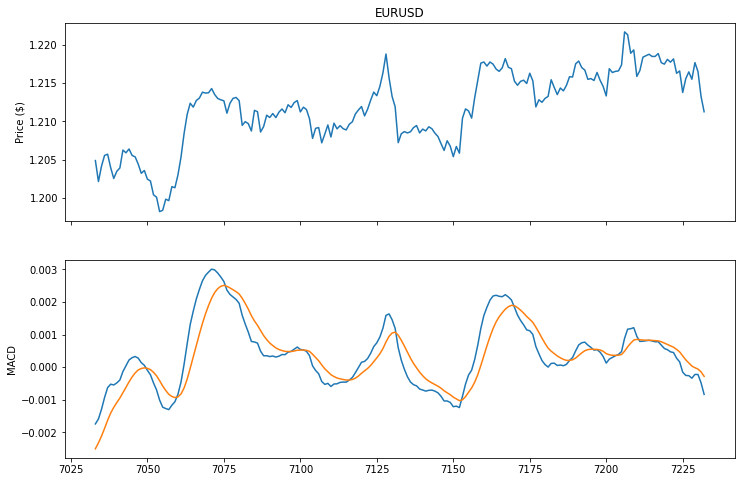

In [25]:
# add prices
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
show_df.close.plot(ax=ax[0])
ax[0].set(title = 'EURUSD', ylabel = 'Price ($)')
    
show_df.macd.plot(ax=ax[1])
show_df.macd_signal.plot(ax=ax[1])
ax[1].set(ylabel = 'MACD')

plt.show()

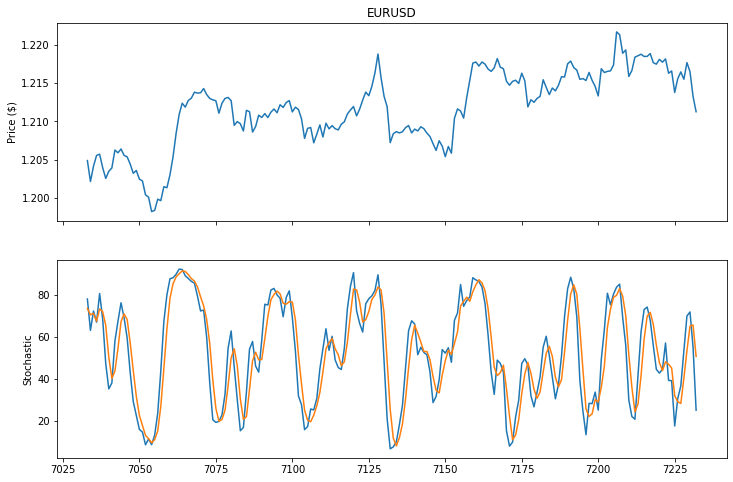

In [26]:
# add prices
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
show_df.close.plot(ax=ax[0])
ax[0].set(title = 'EURUSD', ylabel = 'Price ($)')
    
show_df.k.plot(ax=ax[1])
show_df.d.plot(ax=ax[1])
ax[1].set(ylabel = 'Stochastic')

plt.show()

In [27]:
def get_all_indicators(dataframe):
    df = dataframe.copy()    
    df["rsi"] = talib.RSI(df["close"], timeperiod=14)
    df["ema_12"] = talib.EMA(df["close"], timeperiod=12)
    df["ema_26"] = talib.EMA(df["close"], timeperiod=26) 

    upper_band, middle_band, lower_band = talib.BBANDS(df["close"], timeperiod=20, 
                                                nbdevup=2, nbdevdn=2, matype=0)

    df["upper_bband"] = upper_band
    df["middle_bband"] = middle_band
    df["lower_bband"] = lower_band


    macd, macd_signal, macd_hist = talib.MACD(df["close"], fastperiod=12, slowperiod=26, 
                                        signalperiod=9)

    df["macd"] = macd 
    df["macd_signal"] = macd_signal 
    df["macd_hist"] = macd_hist
    
    k, d = talib.STOCH(df["high"], df["low"], df["close"], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

    df["k"] = k
    df["d"] = d
    
    return df

In [28]:
usd_jpy = pd.read_csv('./Data/USDJPY.csv')
prepare_dataset(usd_jpy, view=False)
usd_jpy = get_all_indicators(usd_jpy)
usd_jpy.head(5)

,date,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
0,2003-01-06 21:00:00,119.571,119.616,119.368,119.616,12289.9004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-06 22:00:00,119.590,119.645,119.517,119.601,11730.4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-06 23:00:00,119.608,119.636,119.500,119.500,11442.5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07 00:00:00,119.691,119.721,119.450,119.553,12804.5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-07 01:00:00,119.527,119.527,119.214,119.462,12569.5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
usd_jpy.dropna(inplace=True)
usd_jpy.head(5)

,date,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
33,2003-01-08 06:00:00,120.436,120.687,120.331,120.596,11794.4004,69.010347,120.132198,119.921418,120.788292,119.79655,118.804808,0.211636,0.067038,0.144598,45.716382,50.669477
34,2003-01-08 07:00:00,120.572,120.656,120.347,120.407,10637.4004,62.713588,120.174475,119.957387,120.857165,119.83185,118.806535,0.217813,0.097193,0.120620,52.899983,48.448860
35,2003-01-08 08:00:00,120.404,120.632,120.324,120.508,12336.2002,64.573838,120.225787,119.998173,120.936120,119.87120,118.806280,0.228226,0.123399,0.104827,56.862745,51.826370
36,2003-01-08 09:00:00,120.538,120.584,120.235,120.319,13210.7002,58.674600,120.240127,120.021938,120.981654,119.90550,118.829346,0.218708,0.142461,0.076247,36.861357,48.874695
37,2003-01-08 10:00:00,120.316,120.567,120.273,120.496,12268.0996,62.160985,120.279492,120.057054,121.043257,119.95620,118.869143,0.222877,0.158544,0.064333,44.736596,46.153566


In [30]:
gbp_usd = pd.read_csv('./Data/GBPUSD.csv')
prepare_dataset(gbp_usd, view=False)
gbp_usd = get_all_indicators(gbp_usd)
gbp_usd.head(5)

,date,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
0,2003-01-06 21:00:00,1.63040,1.63283,1.62707,1.62707,2657.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-06 22:00:00,1.62683,1.62725,1.62524,1.62576,2582.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-06 23:00:00,1.62579,1.62676,1.62543,1.62614,2947.4272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07 00:00:00,1.65538,1.65575,1.65305,1.65312,2944.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-07 01:00:00,1.65299,1.65536,1.65299,1.65470,3043.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
gbp_usd.dropna(inplace=True)
gbp_usd.head(5)

,date,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
33,2003-01-08 06:00:00,1.61044,1.61046,1.60683,1.60759,3240.4272,25.150160,1.625738,1.636448,1.692333,1.643361,1.594388,-0.010495,-0.003095,-0.007400,43.232257,36.714570
34,2003-01-08 07:00:00,1.60741,1.60818,1.60595,1.60711,3464.2100,24.915535,1.622872,1.634274,1.691693,1.640799,1.589906,-0.011221,-0.004720,-0.006501,25.142891,36.245150
35,2003-01-08 08:00:00,1.60707,1.60768,1.60542,1.60564,3592.0486,24.171824,1.620221,1.632153,1.690635,1.638184,1.585733,-0.011779,-0.006132,-0.005647,11.497740,26.624296
36,2003-01-08 09:00:00,1.60551,1.60572,1.60016,1.60172,4508.3784,22.263383,1.617375,1.629899,1.689365,1.635400,1.581435,-0.012394,-0.007384,-0.005010,11.531944,16.057525
37,2003-01-08 10:00:00,1.60190,1.60381,1.60140,1.60286,4072.5701,24.139199,1.615142,1.627896,1.686994,1.632527,1.578059,-0.012645,-0.008436,-0.004208,14.366501,12.465395


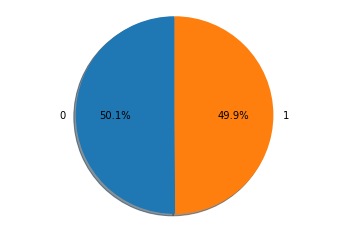

,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
target,,,,,,,,,,,,,,,,
0,1.258767,1.259832,1.257755,1.258829,21380.172437,50.621572,1.258700,1.258655,1.272541,1.258662,1.244783,0.000045,0.000033,0.000012,51.200206,50.833940
1,1.258371,1.259389,1.257310,1.258315,21716.921138,49.668399,1.258439,1.258483,1.272347,1.258475,1.244603,-0.000043,-0.000032,-0.000011,49.245499,49.610185


,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
target,,,,,,,,,,,,,,,,
0,0.121968,0.122149,0.121787,0.121984,33408.864869,18.988214,0.121413,0.120773,0.125976,0.121376,0.120743,0.007863,0.007382,0.002471,24.889049,23.003707
1,0.122542,0.122700,0.122340,0.122523,33982.069333,19.020313,0.121848,0.121115,0.126385,0.121736,0.121024,0.007816,0.007281,0.002494,24.867530,23.080678


In [144]:
create_target(eur_usd,1)
group_by_target = eur_usd.groupby(by=['target'])
mean = group_by_target.mean()
std = group_by_target.std()

display(mean)
display(std)

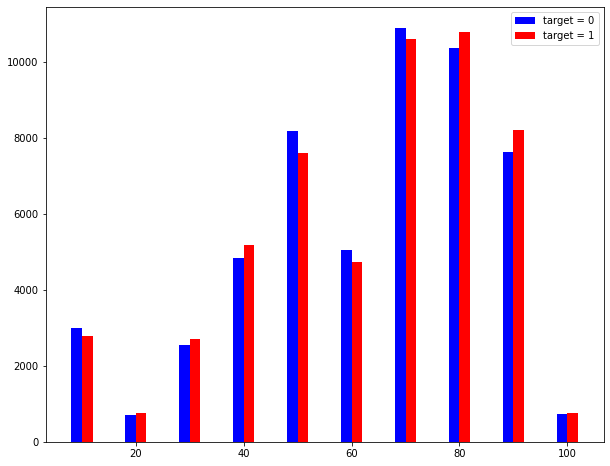

In [145]:
cut_labels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
eur_usd['discrete_rsi'] = pd.cut(eur_usd['rsi'], bins=cut_bins, labels=cut_labels)

target_counts = pd.DataFrame({'count' : eur_usd.groupby( [ "discrete_rsi", "target"] ).size()}).reset_index()
#display(target_counts)

x = np.array(eur_usd.discrete_rsi.unique())
y = target_counts.loc[target_counts['target'] == 0]['count'].values
z = target_counts.loc[target_counts['target'] == 1]['count'].values


plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
ax.bar(x-1, y, width=2, color='b', align='center', label='target = 0')
ax.bar(x+1, z, width=2, color='r', align='center', label='target = 1')
plt.legend(loc='best')

plt.show()

In [197]:
def view_distribution_feature(dataframe, feature, labels, bins):
    df = dataframe.copy()
    cut_labels = labels
    cut_bins = bins
    
    new_feature = 'discrete_' + feature
    
    df[new_feature] = pd.cut(df[feature], bins=cut_bins, labels=cut_labels)
    
    target_counts = pd.DataFrame({'count' : df.groupby([new_feature, 'target'] ).size()}).reset_index()

    df.dropna(inplace=True)
    
    x = np.array(df[new_feature].unique())
    y = target_counts.loc[target_counts['target'] == 0]['count'].values
    z = target_counts.loc[target_counts['target'] == 1]['count'].values

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)
    ax.bar(x-1, y, width=2, color='b', align='center', label='target = 0')
    ax.bar(x+1, z, width=2, color='r', align='center', label='target = 1')
    plt.legend(loc='best')

    plt.show()

In [147]:
def get_evolution_of_feature_according_target(df, feature, max_periods_fordward):

    lower_mean_evolution = []
    upper_mean_evolution = []

    lower_std_evolution = []
    upper_std_evolution = []

    for i in range(1, max_periods_fordward):
        create_target(eur_usd, i, view=False)

        group_by_target = df.groupby(by=['target'])

        mean = group_by_target[feature].mean()[0]
        std = group_by_target[feature].std()[0]
        lower_mean_evolution.append(mean)
        lower_std_evolution.append(std)

        mean = group_by_target[feature].mean()[1]
        std = group_by_target[feature].std()[1]
        upper_mean_evolution.append(mean)
        upper_std_evolution.append(std) 

    plt.figure(figsize=(20, 5))
    plt.plot(upper_mean_evolution, label = 'Mean target up ' + feature)
    plt.plot(lower_mean_evolution, label = 'Mean target down ' + feature)
    plt.title('Close price of EURUSD')
    plt.legend(loc='best')
    plt.show()

    plt.figure(figsize=(20, 5))
    plt.plot(upper_std_evolution, label = 'Std target up ' + feature)
    plt.plot(lower_std_evolution, label = 'Std target down ' + feature)
    plt.title('Close price of EURUSD')
    plt.legend(loc='best')
    plt.show()

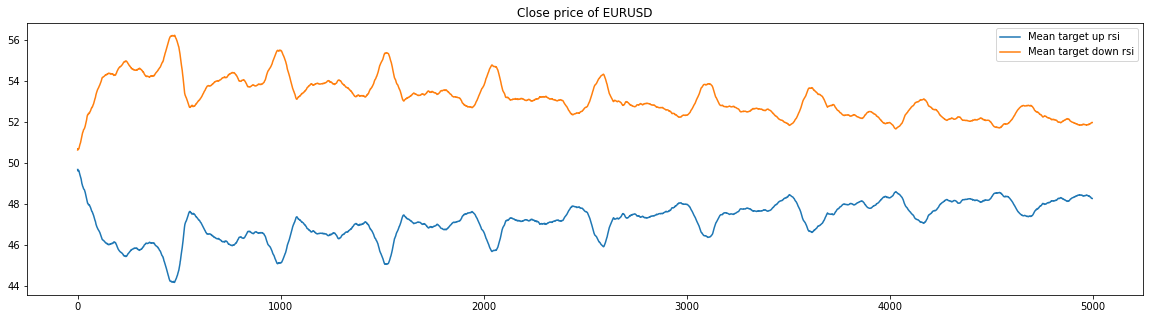

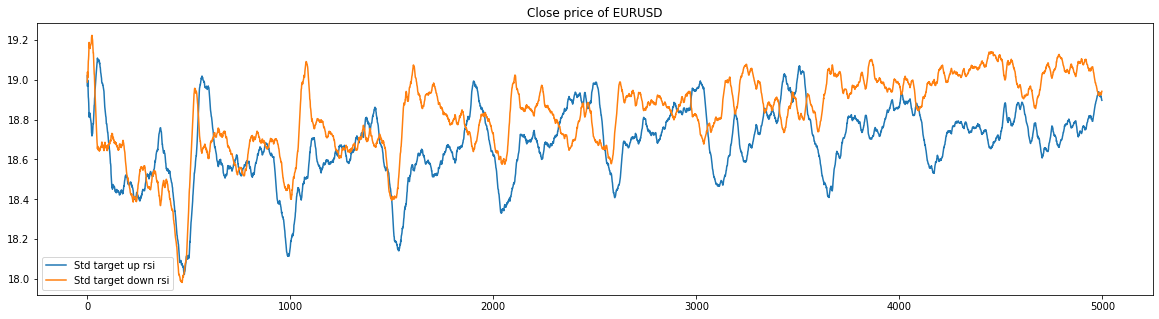

In [148]:
get_evolution_of_feature_according_target(eur_usd, 'rsi', 5000)

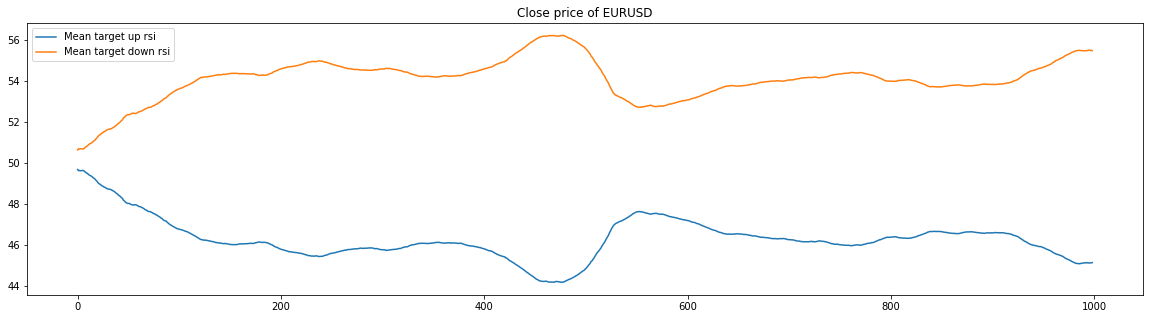

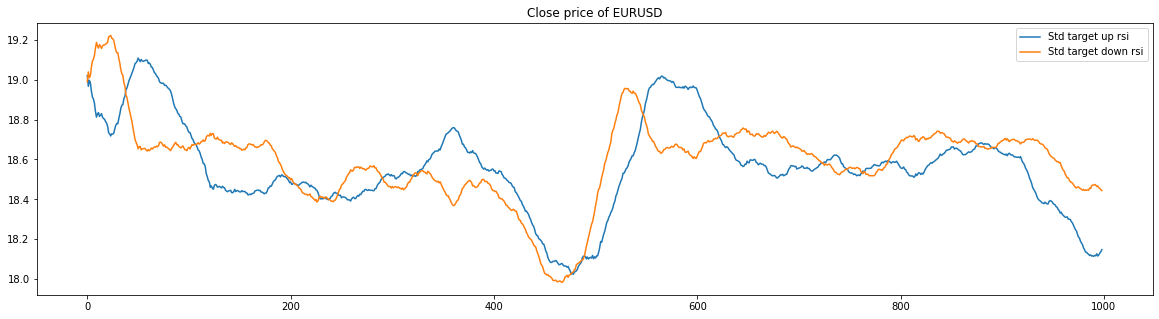

In [54]:
get_evolution_of_feature_according_target(eur_usd, 'rsi', 1000)

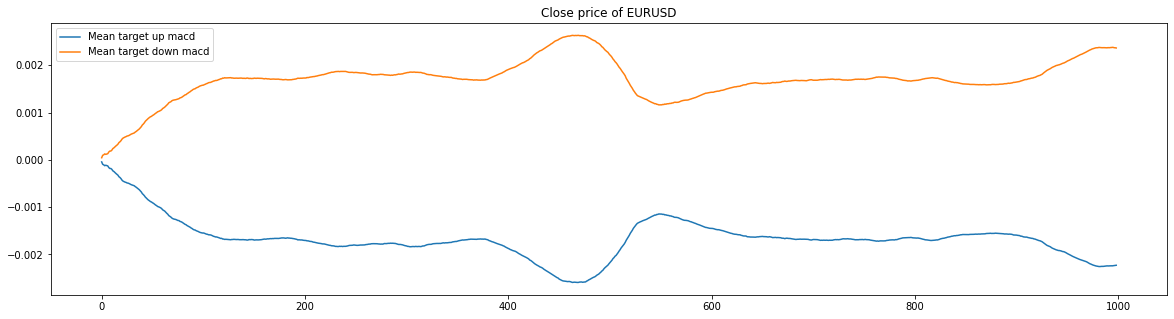

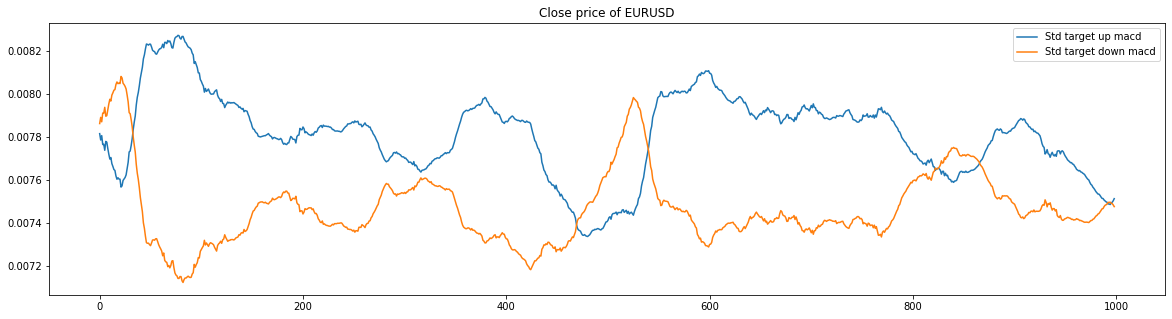

In [35]:
get_evolution_of_feature_according_target(eur_usd, 'macd', 1000)

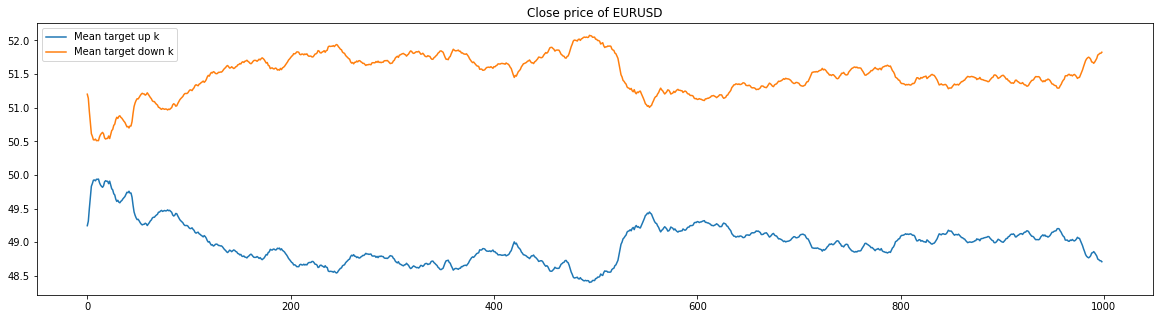

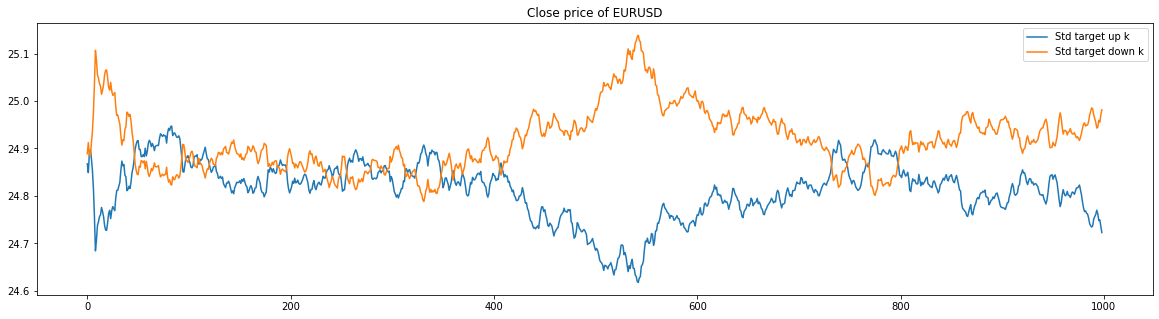

In [36]:
get_evolution_of_feature_according_target(eur_usd, 'k', 1000)

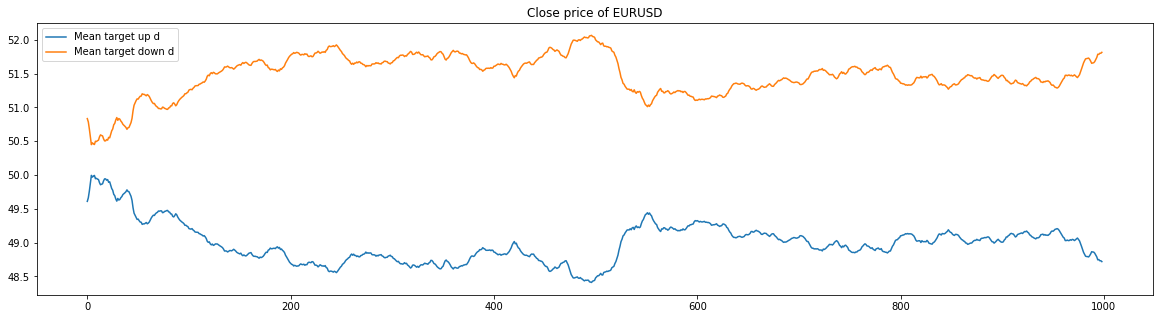

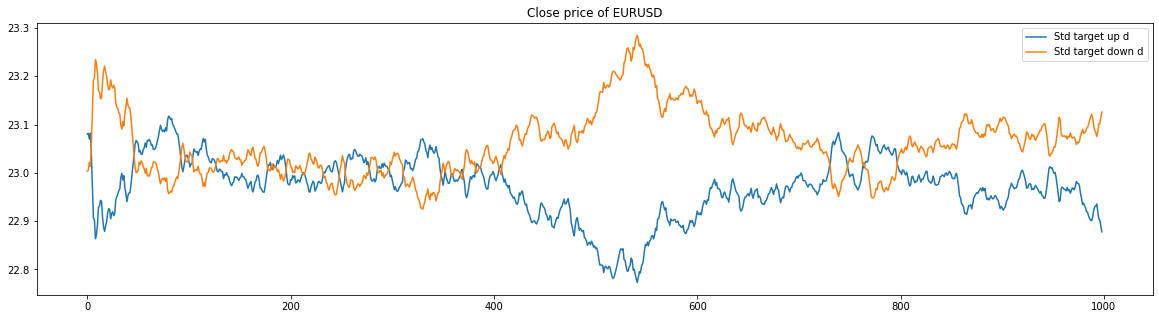

In [37]:
get_evolution_of_feature_according_target(eur_usd, 'd', 1000)

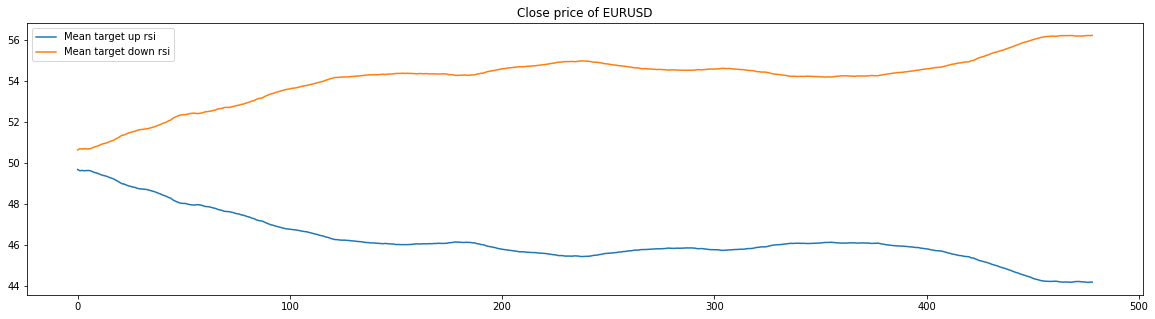

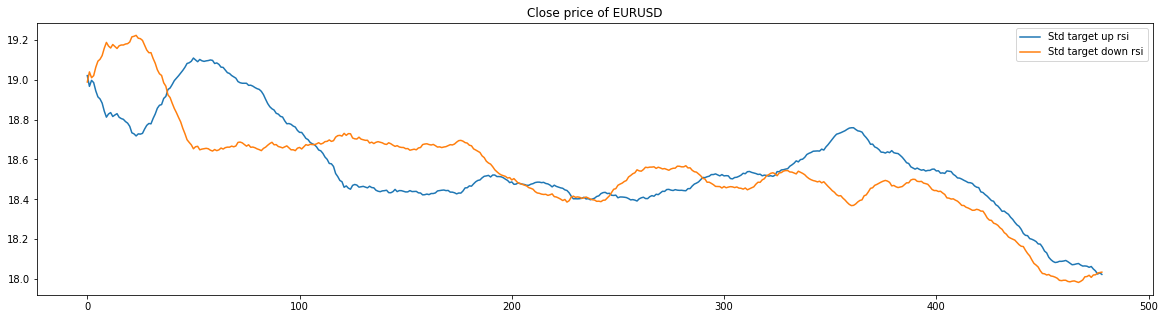

In [149]:
get_evolution_of_feature_according_target(eur_usd, 'rsi', 480)

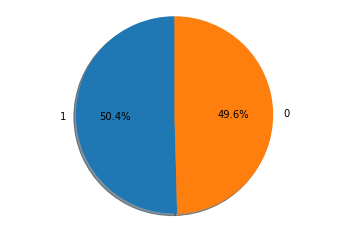

,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
target,,,,,,,,,,,,,,,,
0,1.274021,1.275063,1.272981,1.274028,20373.362850,56.191685,1.271694,1.269111,1.284127,1.269997,1.255867,0.002583,0.002442,0.000141,52.004852,51.994174
1,1.243375,1.244415,1.242341,1.243373,22704.715643,44.197520,1.245664,1.248203,1.260955,1.247330,1.233705,-0.002538,-0.002401,-0.000138,48.467101,48.477343


,open,high,low,close,volume,rsi,ema_12,ema_26,upper_bband,middle_bband,lower_bband,macd,macd_signal,macd_hist,k,d
target,,,,,,,,,,,,,,,,
0,0.126185,0.126370,0.125976,0.126183,31891.609034,18.045434,0.125258,0.124115,0.129382,0.124948,0.124636,0.007481,0.006943,0.002567,24.959528,23.098432
1,0.116280,0.116436,0.116104,0.116279,35345.618616,18.033875,0.116524,0.116819,0.121866,0.117044,0.116033,0.007340,0.006898,0.002388,24.711044,22.869428


In [180]:
create_target(eur_usd,480)
group_by_target = eur_usd.groupby(by=['target'])
mean = group_by_target.mean()
std = group_by_target.std()

display(mean)
display(std)

In [181]:
eur_usd.dropna(inplace=True)

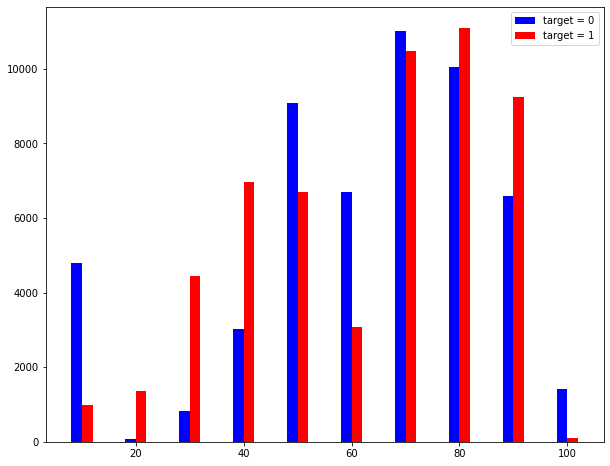

In [182]:
labels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
view_distribution_feature(eur_usd, 'rsi', labels, bins)

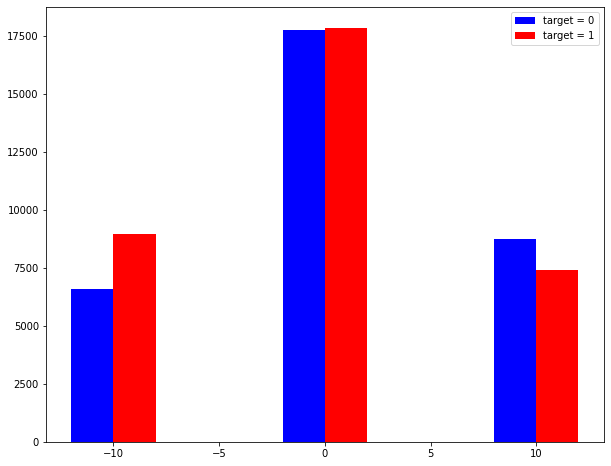

In [203]:
labels = [-10, 0, 10]
bins = [-0.003, -0.001, 0.001, 0.003]
view_distribution_feature(eur_usd, 'macd', labels, bins)

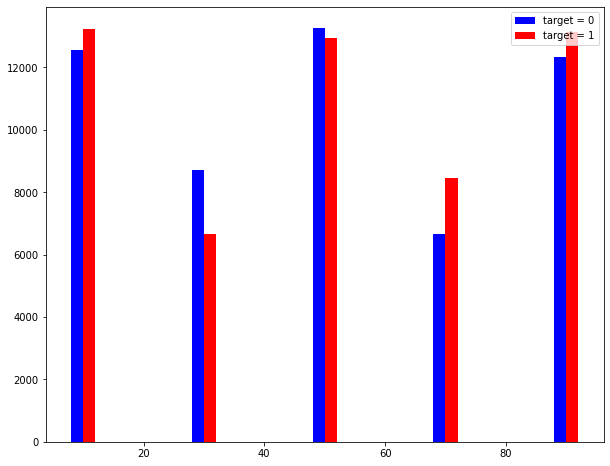

In [206]:
labels = [10, 30, 50, 70, 90,]
bins = [0, 20, 40, 60, 80, 100]
view_distribution_feature(eur_usd, 'k', labels, bins)

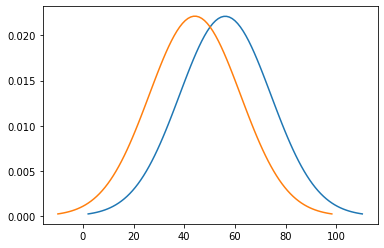

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = mean.rsi[0]
sigma = std.rsi[0]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

mu = mean.rsi[1]
sigma = std.rsi[1]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

In [ ]:
car_data_count_series = car_data_count.iloc[:,0]
features_of_interest = pd.DataFrame({'equipment': car_data_avg['equipment'], 'availability': car_data_count_series})
alternative_method = car_data_avg.merge(car_data_count, left_index=True, right_index=True, suffixes=['_avg','_count'])
alternative_method[['equipment_avg', 'firstRegistration_count']].sort_values(by=['equipment_avg', 'firstRegistration_count'], ascending=True).plot(kind='barh')